In [1]:
import pyAgrum as gum
import pandas as pd
import numpy as np

In [2]:
bn=gum.BayesNet('pulsarStars')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [3]:
 import pyAgrum.lib.notebook as gnb


In [4]:
data = pd.read_csv("alldata.csv")

In [5]:
l=[]
for col in data.columns.values:
    bins= np.linspace(min(data[col]),max(data[col]),9)
    l.append(pd.DataFrame(np.digitize(data[col],bins),columns=[col]))
discr_data=pd.concat(l,join='outer',axis=1)
discr_data.to_csv("discr_alldata.csv",index=False)

In [6]:
dfl=np.array_split(discr_data, 2)
train=dfl[0]
dfl=np.array_split(dfl[1],2)
train=pd.concat([train,dfl[0]])
train.to_csv("train.csv",index=False)
test=dfl[1]
test.to_csv("test.csv",index=False)

Learned in 0.051915646s


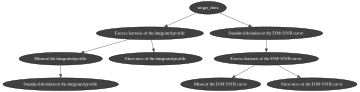

In [7]:
learner=gum.BNLearner("train.csv")
learner.useMIIC()
bn=learner.learnBN()
print("Learned in {0}s using MIIC (constraints based approach)".format(learner.currentTime()))
gnb.showBN(bn)

In [8]:
gum.saveBN(bn,"pulsarStars.net")

Learned in 0.004285252s using Greedy Hill Climbing (search approach)


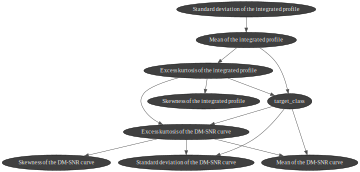

In [9]:
learner=gum.BNLearner("train.csv")
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}s using Greedy Hill Climbing (search approach)".format(learner.currentTime()))
gnb.showBN(bn2)

Learned in 44.346461603s using Log Likelihood algorithm (score based approach)


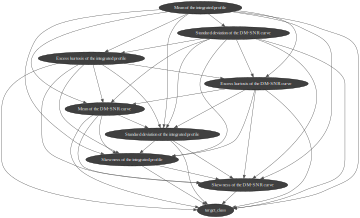

In [10]:
learner=gum.BNLearner("train.csv")
learner.useScoreLog2Likelihood()
bn3=learner.learnBN()
print("Learned in {0}s using Log Likelihood algorithm (score based approach)".format(learner.currentTime()))
gnb.showBN(bn3)

In [11]:
bn4=learner.learnParameters(bn.dag())


In [20]:
gnb.showPotential(bn4.cpt(0))

In [13]:
import pyAgrum.lib.bn2roc as b2r

In [14]:
gnb.showInformation(bn4,{},size="20")


In [15]:
ie=gum.LazyPropagation(bn4)

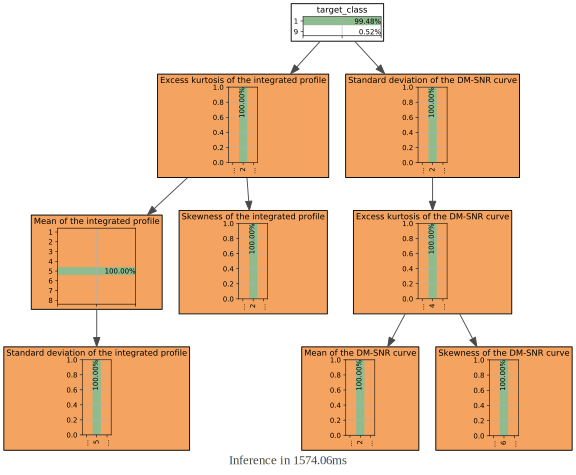

In [16]:
gnb.showInference(bn4,evs={0: 4, 1: 4, 2: 1, 3: 1, 4: 1, 5: 1, 6: 3, 7: 5})


In [17]:
ie=gum.LazyPropagation(bn4)

In [18]:
evs={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5, 7: 2}
ie.setEvidence(evs)
ie.makeInference()
ie.posterior(8)

(gum::Potential<double>@0x3232980) <target_class:1> :: 0.298832 /<target_class:9> :: 0.701168

In [37]:
count=0
true_prediction=0
for index, row in test.iterrows():
    evs = dict()
    evs[0]=row[0].item()
    evs[1]=row[1].item()
    evs[2]=row[2].item()
    evs[3]=row[3].item()
    evs[4]=row[4].item()
    evs[5]=row[5].item()
    evs[6]=row[6].item()
    evs[7]=row[7].item()
    if evs[0] in [8,9]:
        continue
    count+=1
    ie.updateEvidence(evs)
    ie.makeInference()
    l=ie.posterior(8).tolist()
    if l[0]==max(l):
        predicted=1
    else:
        predicted=9
    if predicted==row[8].item():
        true_prediction+=1
print("{0:.2f}% good predictions".format(true_prediction*100/count))

84.42% good predictions
